In [1]:
import pandas as pd

url='https://docs.google.com/spreadsheets/d/16SVLDfw9gUupoYcoXcu80wRtspeIHsjI/edit?usp=sharing&ouid=117972447095292985250&rtpof=true&sd=true'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_excel(dwn_url)

df.shape

(22712, 8)

In [2]:
df['FECHA_UTC'] = df['FECHA_UTC'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22712 entries, 0 to 22711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           22712 non-null  int64  
 1   FECHA_UTC    22712 non-null  object 
 2   HORA_UTC     22712 non-null  int64  
 3   LATITUD      22712 non-null  float64
 4   LONGITUD     22712 non-null  float64
 5   PROFUNDIDAD  22712 non-null  int64  
 6   MAGNITUD     22712 non-null  float64
 7   FECHA_CORTE  22712 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.4+ MB


In [3]:
df.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE
0,0,19600113,154034,-16.145,-72.144,60,7.5,20223006
1,1,19600115,93024,-15.000,-75.000,70,7.0,20223006
2,2,19600117,25758,-14.500,-74.500,150,6.4,20223006
3,3,19600123,33732,-12.500,-68.500,300,5.8,20223006
4,4,19600130,50724,-5.500,-77.500,100,5.7,20223006


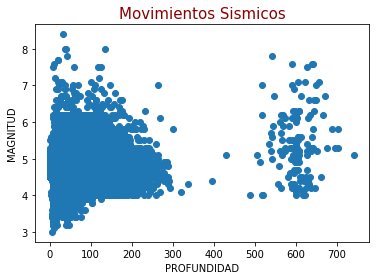

In [4]:
import matplotlib.pyplot as plt  # alias

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }
        

# Adding a title and axis text
plt.title("Movimientos Sismicos", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("PROFUNDIDAD")
plt.ylabel("MAGNITUD")

# plot using x, y (coordinates)
plt.scatter(df.PROFUNDIDAD.tolist(),df.MAGNITUD.tolist())
plt.show()

## Analizando por incidencia mensual

In [5]:
df['FECHA_UTC_M'] = df['FECHA_UTC'].apply(lambda x:x[4:6])
dfSismoMes = df.groupby(['FECHA_UTC_M'])['FECHA_UTC_M'].count()
dfSismoMes = dfSismoMes.to_frame()
dfSismoMes.columns = ['CANTIDAD']
dfSismoMes.reset_index(inplace=True)
dfSismoMes.head()

,FECHA_UTC_M,CANTIDAD
0,01,1768
1,02,1770
2,03,1884
3,04,1785
4,05,1919


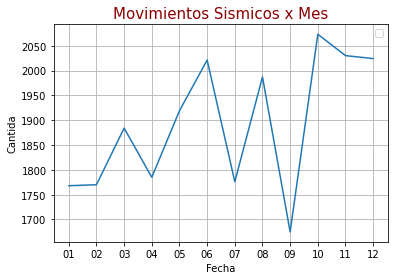

In [6]:
import matplotlib.pyplot as plt  # alias

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }
        
# Adding a title and axis text
plt.title("Movimientos Sismicos x Mes", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Fecha")
plt.ylabel("Cantida")

# plot using x, y (coordinates)
plt.plot(dfSismoMes.FECHA_UTC_M.tolist(),dfSismoMes.CANTIDAD.tolist())

plt.legend()
plt.grid(True)
plt.show()

In [30]:
dfMagnitudMenor = df[df.MAGNITUD<=4.4]
print('Cantidad de Sismos de Menor Magnitud = ' + str(dfMagnitudMenor.shape[0]))
dfMagnitudMedia = df[(df.MAGNITUD>=4.5) & (df.MAGNITUD<=6.0)]
print('Cantidad de Sismos de Media Magnitud = ' + str(dfMagnitudMedia.shape[0]))
dfMagnitudTerremoto = df[df.MAGNITUD>=6.1]
print('Cantidad de Sismos de Magnitud Terremoto = ' + str(dfMagnitudTerremoto.shape[0]))

Cantidad de Sismos de Menor Magnitud = 2234
Cantidad de Sismos de Media Magnitud = 20251
Cantidad de Sismos de Magnitud Terremoto = 227


In [31]:
dfMagnitudTerremoto.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE,FECHA_UTC_M
0,0,19600113,154034,-16.145,-72.144,60,7.5,20223006,01
1,1,19600115,93024,-15.000,-75.000,70,7.0,20223006,01
2,2,19600117,25758,-14.500,-74.500,150,6.4,20223006,01
7,7,19600309,235425,-16.389,-73.817,80,6.2,20223006,03
8,8,19600401,131823,-14.500,-73.500,100,6.1,20223006,04


In [32]:
import folium
from folium import plugins

# Initialize the map:
folium_map = folium.Map(location=[-12.04318, -77.02824], zoom_start=5, tiles='openstreetmap')

#plot fastmarkercluster
plugins.FastMarkerCluster(data=list(zip(dfMagnitudTerremoto['LATITUD'].values, dfMagnitudTerremoto['LONGITUD'].values)), name="Cantidad de Terremotos").add_to(folium_map)

# convert to (n, 2) nd-array format for heatmap
arr = dfMagnitudTerremoto[['LATITUD', 'LONGITUD']].values

# plot heatmap
plugins.HeatMap(arr, radius=16, name="Mapa de Calor").add_to(folium_map)

#minimap
minimap = plugins.MiniMap()
folium_map.add_child(minimap)

folium.LayerControl(collapsed=False).add_to(folium_map)

folium_map

In [33]:
dfMagnitudMedia.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE,FECHA_UTC_M
3,3,19600123,33732,-12.5,-68.5,300,5.8,20223006,01
4,4,19600130,50724,-5.5,-77.5,100,5.7,20223006,01
5,5,19600208,190616,-8.5,-74.5,136,5.3,20223006,02
6,6,19600213,204006,-17.5,-70.0,150,5.9,20223006,02
9,9,19600504,12852,-18.0,-71.5,100,5.0,20223006,05


In [35]:
import folium
from folium import plugins

# Initialize the map:
folium_map = folium.Map(location=[-12.04318, -77.02824], zoom_start=5, tiles='openstreetmap')

#plot fastmarkercluster
plugins.FastMarkerCluster(data=list(zip(dfMagnitudMedia['LATITUD'].values, dfMagnitudMedia['LONGITUD'].values)), name="Cantidad de Sismos (magnitud media)").add_to(folium_map)

# convert to (n, 2) nd-array format for heatmap
arr = dfMagnitudMedia[['LATITUD', 'LONGITUD']].values

# plot heatmap
plugins.HeatMap(arr, radius=16, name="Mapa de Calor").add_to(folium_map)

#minimap
minimap = plugins.MiniMap()
folium_map.add_child(minimap)

folium.LayerControl(collapsed=False).add_to(folium_map)

folium_map